In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')




In [3]:
X = pd.read_csv("../Data/q4x.dat",delimiter="\s+",header=None)
Y = pd.read_csv("../Data/q4y.dat",delimiter="\s+",header=None)

In [4]:
x1 = np.array(X[0])
x2 = np.array(X[1])

x1 = (x1 - np.mean(x1))/np.std(x1)
x2 = (x2 - np.mean(x2))/np.std(x2)

x_data = np.column_stack((x1,x2))

In [5]:
y_data = Y[0].to_list()

y_canada = [1 if x == 'Canada' else 0 for x in y_data]
y_alaska = [1 if x == 'Alaska' else 0 for x in y_data]

y_canada = np.array(y_canada)
y_alaska = np.array(y_alaska)


In [6]:
# 0 for alaska, 1 for canada
mu_0 = np.dot(y_alaska.T, x_data) /np.sum(y_alaska)
mu_1 = np.dot(y_canada.T, x_data) /np.sum(y_canada)


In [7]:
Alaska_temp = (x_data - mu_0)*np.column_stack((y_alaska,y_alaska))
Canada_temp = (x_data - mu_1)*np.column_stack((y_canada,y_canada))
cov_mat = (np.dot(Alaska_temp.T,Alaska_temp) +  np.dot(Canada_temp.T,Canada_temp))/len(y_data)

In [8]:
print(f"Mu_0 is {mu_0}")
print(f"Mu_1 is {mu_1}")
print(f"""Covariance Matrix is 
{cov_mat}""")

Mu_0 is [-0.75529433  0.68509431]
Mu_1 is [ 0.75529433 -0.68509431]
Covariance Matrix is 
[[ 0.42953048 -0.02247228]
 [-0.02247228  0.53064579]]


In [9]:
import plotly.graph_objects as go


trace_0 = go.Scatter(x=x1[y_canada == 0], y=x2[y_canada == 0], mode='markers', marker=dict(
                                        color='blue', symbol='circle',size=10,
                                        line=dict(width=2,
                                        color='DarkSlateGrey')
                                        ), name='Alaska')
trace_1 = go.Scatter(x=x1[y_canada == 1], y=x2[y_canada == 1], mode='markers', marker=dict(
                                        color='red', symbol='x',size=10,
                                        line=dict(width=2,
                                        color='DarkSlateGrey')
                                        ), name='Canada')



layout = go.Layout(title='Data visualised', xaxis_title='X1', yaxis_title='X2')
fig = go.Figure(data=[trace_0, trace_1], layout=layout)

fig.write_html('data_visualised.html')

fig.show()



In [10]:
from scipy.stats import multivariate_normal

x, y = np.mgrid[-3.0:3.0:100j, -3.0:3.0:100j]
xy = np.column_stack([x.flat, y.flat])

z_alaska = multivariate_normal.pdf(xy, mean=mu_0, cov=cov_mat)
z_alaska = z_alaska.reshape(x.shape)

z_canada = multivariate_normal.pdf(xy, mean=mu_1, cov=cov_mat)
z_canada = z_canada.reshape(x.shape)

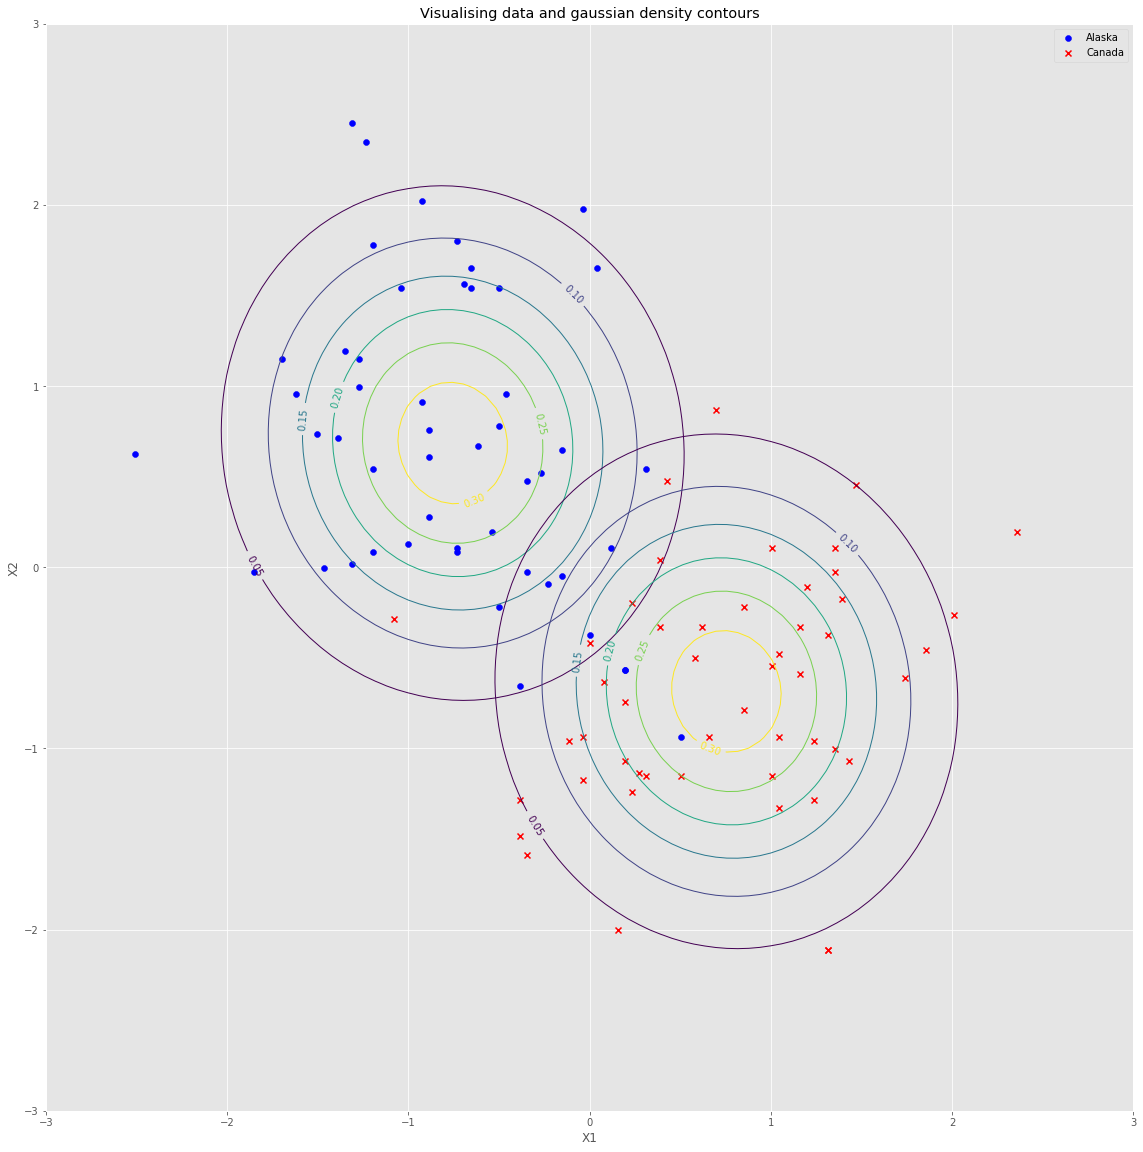

In [27]:
fig,ax = plt.subplots(figsize=(20, 20))
ax.set_aspect('equal')
CS = ax.contour(x, y, z_alaska, extend='both',linewidths=1)
ax.clabel(CS, inline=True, fontsize=10)
CS = ax.contour(x, y, z_canada, extend='both',linewidths=1)
ax.clabel(CS, inline=True, fontsize=10)

plt.scatter(x=x1[y_canada == 0], y=x2[y_canada == 0], label='Alaska', color='blue', marker='o')
plt.scatter(x=x1[y_canada == 1], y=x2[y_canada == 1], label='Canada', color='red', marker='x')

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Visualising data and gaussian density contours") 
plt.legend()
plt.savefig('Plots/linear_visualised.png', dpi=300, bbox_inches='tight')
plt.show()
# 

In [18]:
cov_inv = np.linalg.inv(cov_mat)

w = np.dot((mu_0-mu_1).T, cov_inv)
c = (np.dot(np.dot(mu_1.T,cov_inv),mu_1) - np.dot(np.dot(mu_0.T,cov_inv),mu_0))/2

-8.881784197001252e-16

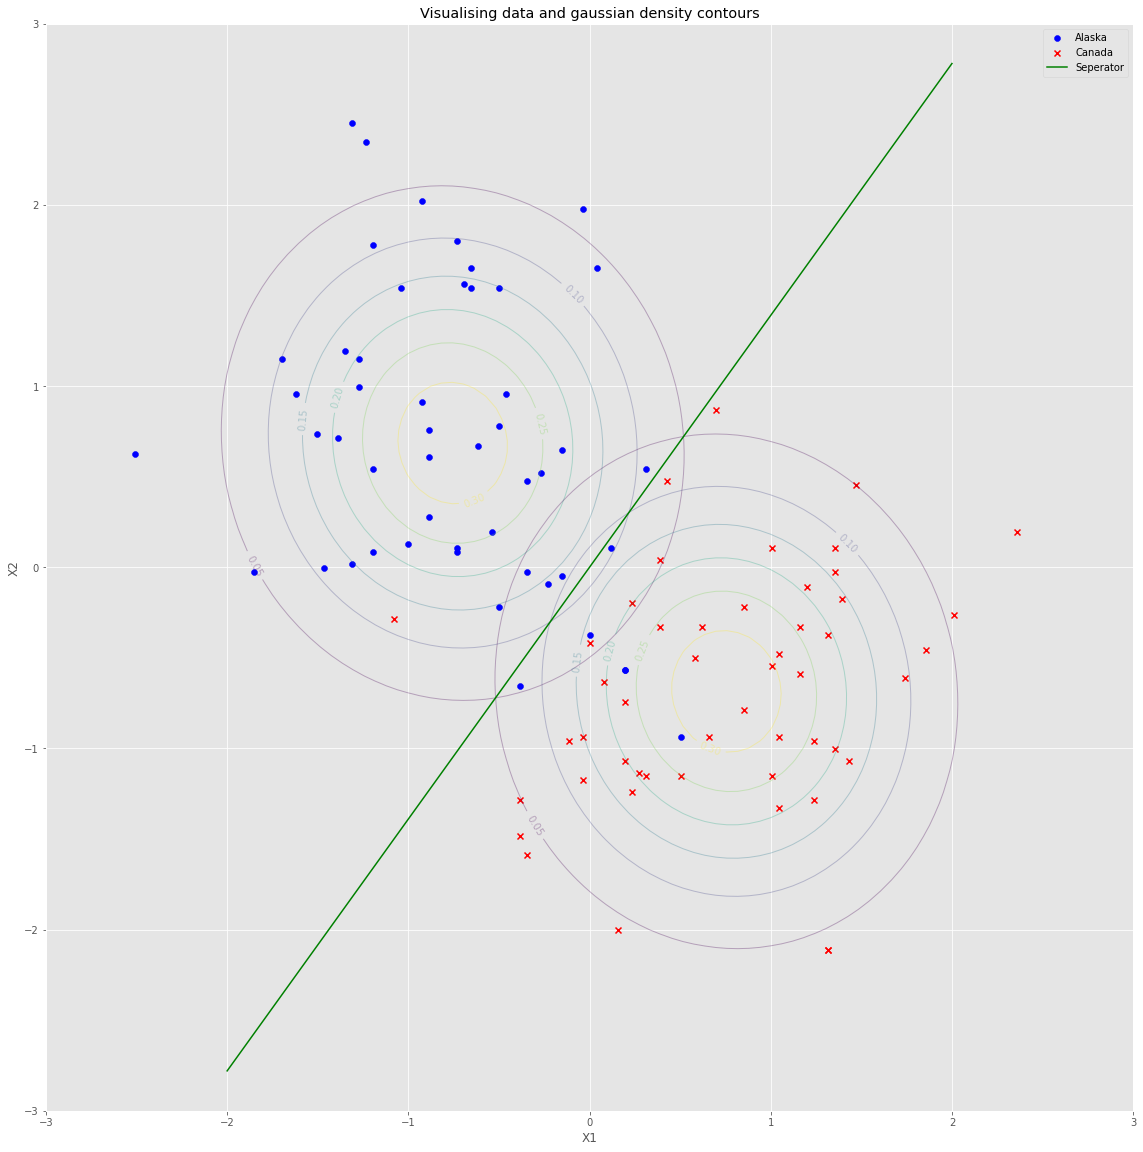

In [26]:
fig,ax = plt.subplots(figsize=(20, 20))
ax.set_aspect('equal')
CS = ax.contour(x, y, z_alaska, extend='both',linewidths=1,alpha=0.3)
ax.clabel(CS, inline=True, fontsize=10)
CS = ax.contour(x, y, z_canada, extend='both',linewidths=1,alpha=0.3)
ax.clabel(CS, inline=True, fontsize=10)

plt.scatter(x=x1[y_canada == 0], y=x2[y_canada == 0], label='Alaska', color='blue', marker='o')
plt.scatter(x=x1[y_canada == 1], y=x2[y_canada == 1], label='Canada', color='red', marker='x')


x_fit = np.linspace(-2, 2, 200)
gda = -(w[0]*x_fit + c)/w[1]

plt.plot(x_fit, gda, label='Seperator', color='green')

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Visualising data and gaussian density contours") 
plt.legend()
plt.savefig('Plots/linear_visualised_with_gda.png', dpi=300, bbox_inches='tight')
plt.show()

In [29]:
cov_mat_alaska = (np.dot(Alaska_temp.T,Alaska_temp))/np.sum(y_alaska)
cov_mat_alaska

array([[ 0.38158978, -0.15486516],
       [-0.15486516,  0.64773717]])

In [30]:
cov_mat_canada = (np.dot(Canada_temp.T,Canada_temp))/np.sum(y_canada)
cov_mat_canada

array([[0.47747117, 0.1099206 ],
       [0.1099206 , 0.41355441]])

In [46]:
cov_mat_alaska_inv = np.linalg.inv(cov_mat_alaska)
cov_mat_canada_inv = np.linalg.inv(cov_mat_canada)

def f(X,Y):
    out = np.zeros((X.shape[0],X.shape[1]))
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            x = X[i,j]
            y = Y[i,j]
            v = np.array([x,y])
            
            value = (np.dot(np.dot(v.T,cov_mat_canada_inv - cov_mat_alaska_inv ),v))/2
            value += np.dot(np.dot(mu_0.T,cov_mat_alaska_inv) - np.dot(mu_1.T,cov_mat_canada_inv),v)
            value += (np.dot(np.dot(mu_1,cov_mat_canada_inv),mu_1) - np.dot(np.dot(mu_0,cov_mat_alaska_inv),mu_0))/2
            
            out[i,j] = value 

    return out
        
        

/tmp/ipykernel_290212/208995401.py:25: UserWarning:

The following kwargs were not used by contour: 'label'



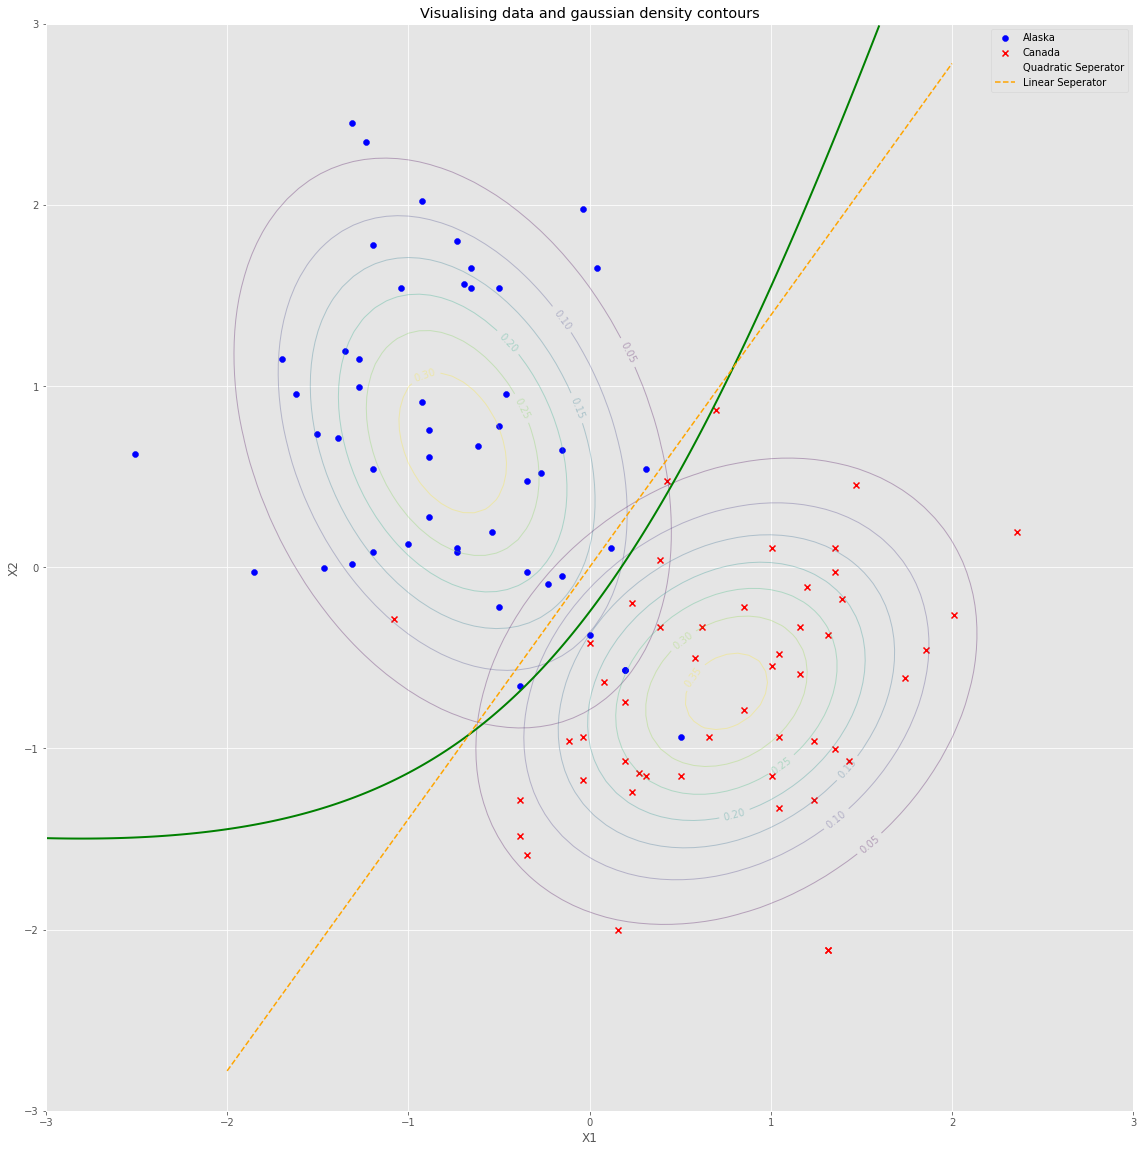

In [55]:
x, y = np.mgrid[-3.0:3.0:100j, -3.0:3.0:100j]
xy = np.column_stack([x.flat, y.flat])

z_alaska_new = multivariate_normal.pdf(xy, mean=mu_0, cov=cov_mat_alaska)
z_alaska_new = z_alaska_new.reshape(x.shape)

z_canada_new = multivariate_normal.pdf(xy, mean=mu_1, cov=cov_mat_canada)
z_canada_new = z_canada_new.reshape(x.shape)

fig,ax = plt.subplots(figsize=(20, 20))
ax.set_aspect('equal')
CS = ax.contour(x, y, z_alaska_new, extend='both',linewidths=1,alpha=0.3)
ax.clabel(CS, inline=True, fontsize=10)
CS = ax.contour(x, y, z_canada_new, extend='both',linewidths=1,alpha=0.3)
ax.clabel(CS, inline=True, fontsize=10)

plt.scatter(x=x1[y_canada == 0], y=x2[y_canada == 0], label='Alaska', color='blue', marker='o')
plt.scatter(x=x1[y_canada == 1], y=x2[y_canada == 1], label='Canada', color='red', marker='x')


x = np.arange(-3.0,3.0,0.01)
y = np.arange(-3.0,3.0,0.01)

X, Y = np.meshgrid(x,y)
CS = plt.contour(x, y, f(X, Y), levels=[0], colors='green', linewidths=2, label='Decision Boundary')
CS.collections[0].set_label("Quadratic Seperator")

x_fit = np.linspace(-2, 2, 200)
gda = -(w[0]*x_fit + c)/w[1]


plt.plot(x_fit, gda, label='Linear Seperator', color='orange',linestyle="dashed")

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Visualising data and gaussian density contours") 
plt.legend()
plt.savefig('Plots/linear_visualised_with_gda.png', dpi=300, bbox_inches='tight')
plt.show()